In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load The Dataset
Clean , and make sure no data is missing or , data type is not correct

In [3]:
df=pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set.csv')

In [4]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

> ###### No Null data were found  

> ###### >column `unmamed: 32`  can be dropped , does not have any usefull data

In [7]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [8]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


# Unique Value of `diagnosis`

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

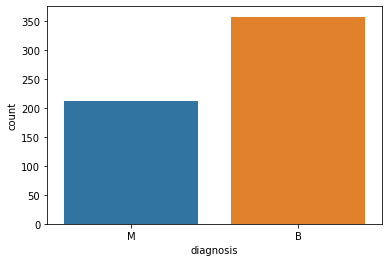

In [10]:
sns.countplot(x=df['diagnosis'],data=df)

> 357 Begnine  
> 212 Malignant

# Check if there are any negative values

In [23]:
de=df.describe()
de.loc['min']

id                         8670.000000
radius_mean                   6.981000
texture_mean                  9.710000
perimeter_mean               43.790000
area_mean                   143.500000
smoothness_mean               0.052630
compactness_mean              0.019380
concavity_mean                0.000000
concave points_mean           0.000000
symmetry_mean                 0.106000
fractal_dimension_mean        0.049960
radius_se                     0.111500
texture_se                    0.360200
perimeter_se                  0.757000
area_se                       6.802000
smoothness_se                 0.001713
compactness_se                0.002252
concavity_se                  0.000000
concave points_se             0.000000
symmetry_se                   0.007882
fractal_dimension_se          0.000895
radius_worst                  7.930000
texture_worst                12.020000
perimeter_worst              50.410000
area_worst                  185.200000
smoothness_worst         

> ###### no negative value were found 

# Is the M Tumor size Bigger than B  Size

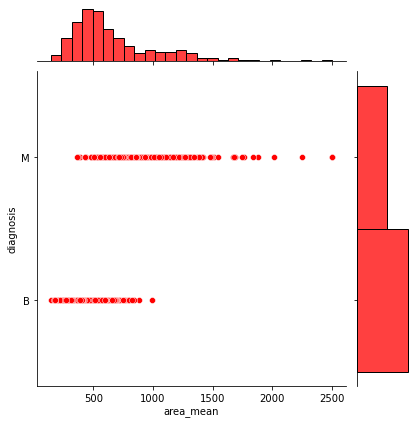

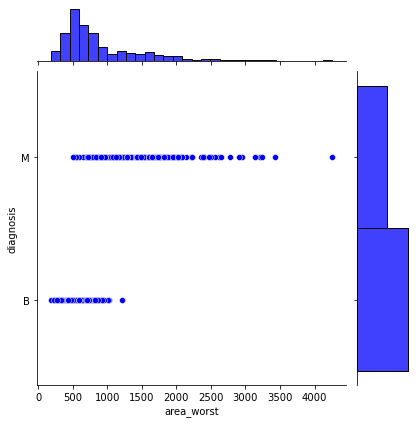

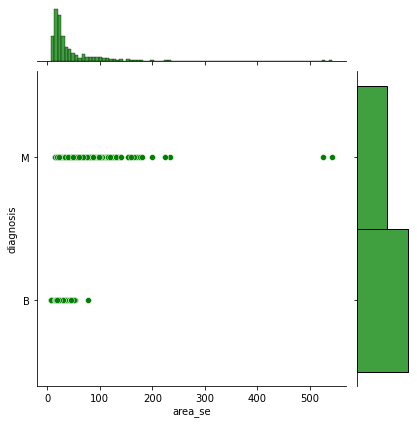

In [29]:
sns.jointplot(x='area_mean',y='diagnosis',data=df,color='r')
sns.jointplot(x='area_worst',y='diagnosis',data=df,color='b')
sns.jointplot(x='area_se',y='diagnosis',data=df,color='g')

In [14]:
df.groupby('diagnosis')['area_mean'].mean()

diagnosis
B    462.790196
M    978.376415
Name: area_mean, dtype: float64

In [15]:
df.groupby('diagnosis')['area_worst'].mean()

diagnosis
B     558.899440
M    1422.286321
Name: area_worst, dtype: float64

In [16]:
df.groupby('diagnosis')['area_se'].mean()

diagnosis
B    21.135148
M    72.672406
Name: area_se, dtype: float64

> ######  B tumors are smaller than M tumors
> ###### which mean , the area can be considred as important feature

# Is the M Tumor size Smother than B  

In [31]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

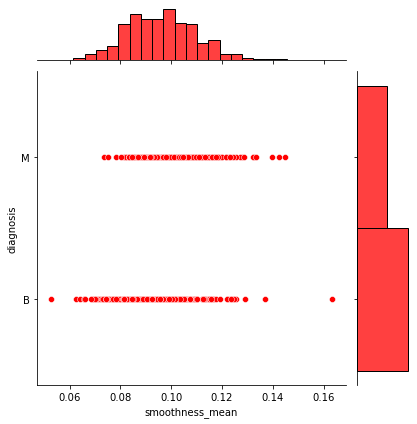

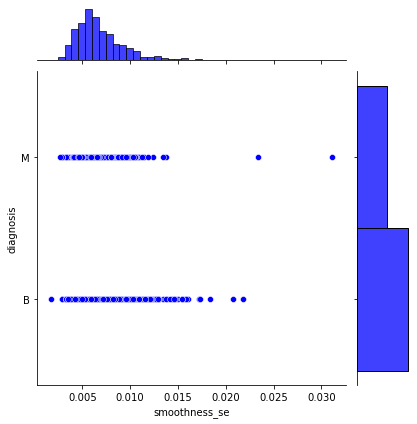

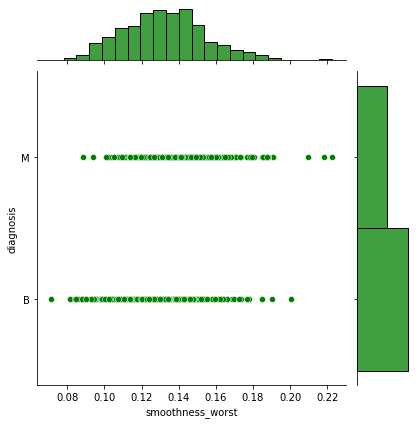

In [32]:
sns.jointplot(x='smoothness_mean',y='diagnosis',data=df,color='r')
sns.jointplot(x='smoothness_se',y='diagnosis',data=df,color='b')
sns.jointplot(x='smoothness_worst',y='diagnosis',data=df,color='g')

In [33]:
df.groupby('diagnosis')['smoothness_mean'].mean()

diagnosis
B    0.092478
M    0.102898
Name: smoothness_mean, dtype: float64

In [34]:
df.groupby('diagnosis')['smoothness_worst'].mean()

diagnosis
B    0.124959
M    0.144845
Name: smoothness_worst, dtype: float64

In [35]:
df.groupby('diagnosis')['smoothness_se'].mean()

diagnosis
B    0.007196
M    0.006780
Name: smoothness_se, dtype: float64

# Train Model

In [38]:
df.drop(['id'],axis=1,inplace=True)

In [58]:
y=df['diagnosis'].map({'B':0,'M':1})
x=df.drop(['diagnosis'],axis=1)


In [72]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score,f1_score,classification_report


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_svc=SVC(kernel='linear',C=0.7)
model_knn=KNeighborsClassifier(n_neighbors=10)


X_train,X_test,y_train,y_test=train_test_split(x,y)


kfol=KFold(n_splits=10)


for t,te in kfol.split(X_train,y_train):
    train_x=X_train.iloc[t]
    train_y=y_train.iloc[t]

    val_x=X_train.iloc[te]
    val_y=y_train.iloc[te]

    print('Support Vector')
    model_svc.fit(train_x,train_y)
    print(f'acc={accuracy_score(val_y,model_svc.predict(val_x))}')
    print(f'f_1score={f1_score(val_y,model_svc.predict(val_x))}')
    #print(f'Cla_erport={classification_report(val_y,model_svc.predict(val_x))}')

    
    print('KNN')
    model_knn.fit(train_x,train_y)
    print(f'acc={accuracy_score(val_y,model_knn.predict(val_x))}')
    print(f'f_1score={f1_score(val_y,model_knn.predict(val_x))}')
    #print(f'Clas_report={classification_report(val_y,model_knn.predict(val_x))}')
    print('-------------------------')





    


    
    



Support Vector
acc=1.0
f_1score=1.0
KNN
acc=0.9534883720930233
f_1score=0.9411764705882353
-------------------------
Support Vector
acc=0.9302325581395349
f_1score=0.8695652173913044
KNN
acc=0.8837209302325582
f_1score=0.7368421052631577
-------------------------
Support Vector
acc=0.9534883720930233
f_1score=0.9375
KNN
acc=0.9302325581395349
f_1score=0.9032258064516129
-------------------------
Support Vector
acc=0.9534883720930233
f_1score=0.9473684210526316
KNN
acc=0.9767441860465116
f_1score=0.972972972972973
-------------------------
Support Vector
acc=0.9534883720930233
f_1score=0.9375
KNN
acc=0.9534883720930233
f_1score=0.9375
-------------------------
Support Vector
acc=0.8372093023255814
f_1score=0.7741935483870968
KNN
acc=0.8372093023255814
f_1score=0.7878787878787878
-------------------------
Support Vector
acc=1.0
f_1score=1.0
KNN
acc=0.9523809523809523
f_1score=0.9333333333333333
-------------------------
Support Vector
acc=0.9285714285714286
f_1score=0.923076923076923
KNN

# Plot AUC of the Two model and coinfusio  matrix

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
print('Support Vector\n')
model_svc.fit(X_test,y_test)
print(f'acc={accuracy_score(y_test,model_svc.predict(X_test))}')
print(f'f_1score={f1_score(y_test,model_svc.predict(X_test))}')
print(f'Cla_erport={classification_report(y_test,model_svc.predict(X_test))}')
print(f'cpnf_matrix={confusion_matrix(y_test,model_svc.predict(X_test))}')



print('\n#################################################\n')
print('KNN\n')
model_knn.fit(X_test,y_test)
print(f'acc={accuracy_score(y_test,model_knn.predict(X_test))}')
print(f'f_1score={f1_score(y_test,model_knn.predict(X_test))}')
print(f'Cla_erport={classification_report(y_test,model_knn.predict(X_test))}')
print(f'cpnf_matrix={confusion_matrix(y_test,model_knn.predict(X_test))}')


Support Vector

acc=0.972027972027972
f_1score=0.9607843137254902
Cla_erport=              precision    recall  f1-score   support

           0       0.97      0.99      0.98        91
           1       0.98      0.94      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

cpnf_matrix=[[90  1]
 [ 3 49]]

#################################################

KNN

acc=0.958041958041958
f_1score=0.9411764705882353
Cla_erport=              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

cpnf_matrix=[[89  2]
 [ 4 48]]
